# Q4-Problem Statement:
Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset

Link: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Data Loading

In [62]:
df=pd.read_csv('online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data Understanding

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df['Weekend']=df['Weekend'].astype(str)
df['Revenue']=df['Revenue'].astype(str)

# Data Analysis

In [7]:
df_num= df.select_dtypes(include=np.number)
df_category=df.select_dtypes(include='O')

In [8]:
df_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [9]:
df_category

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


## Univariate Analysis

### Numerical Data Analysis

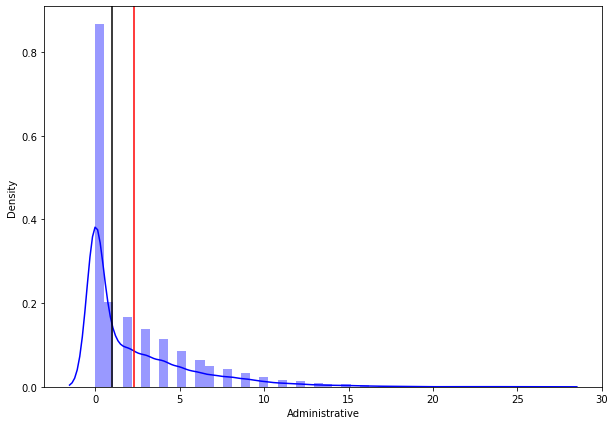

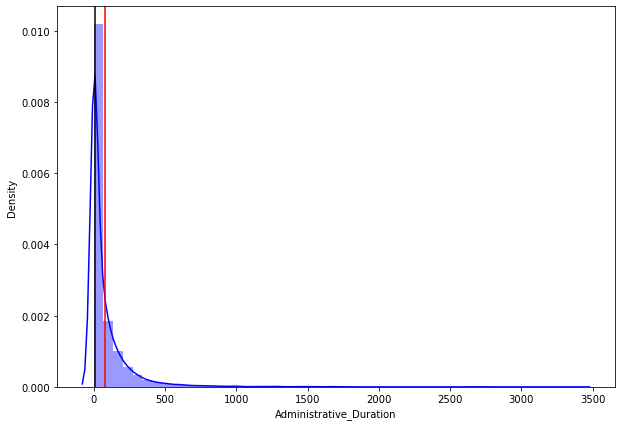

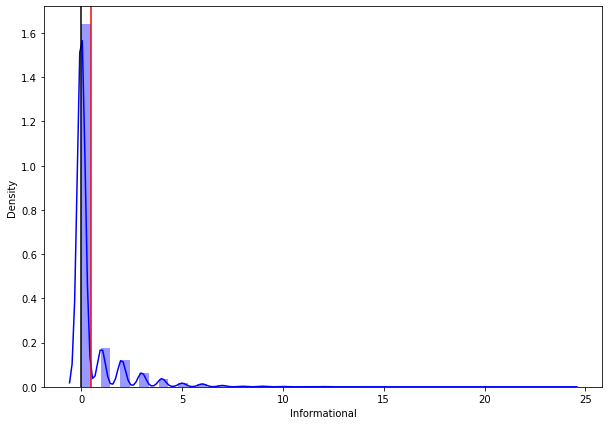

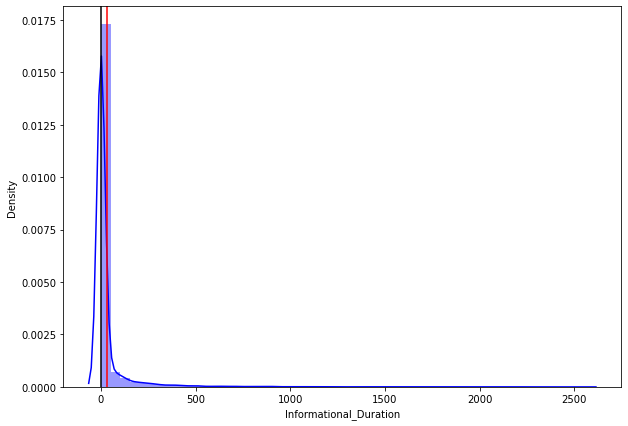

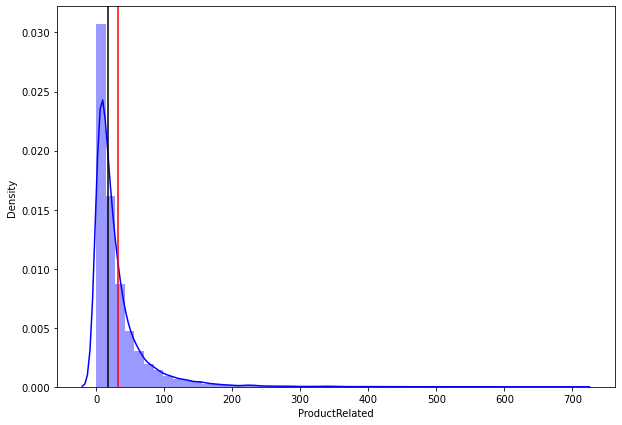

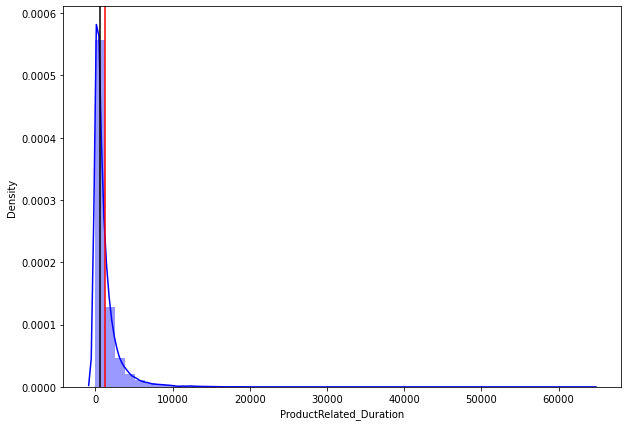

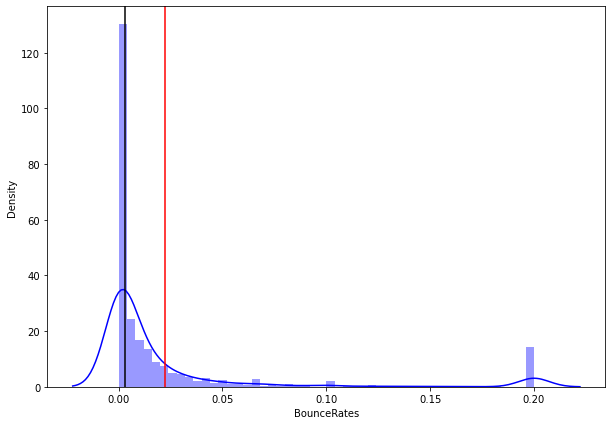

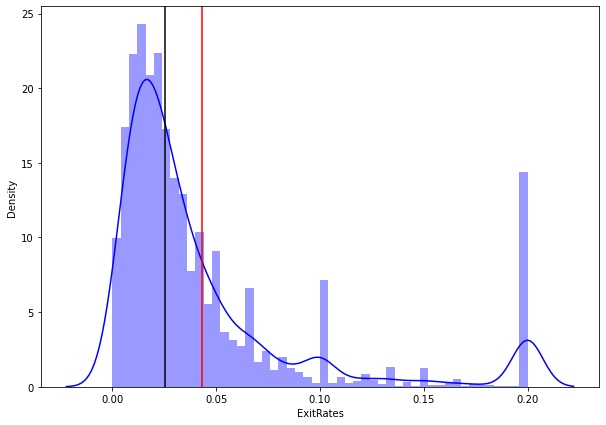

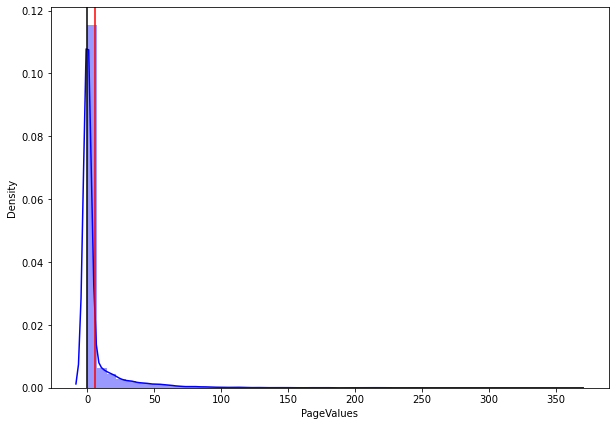

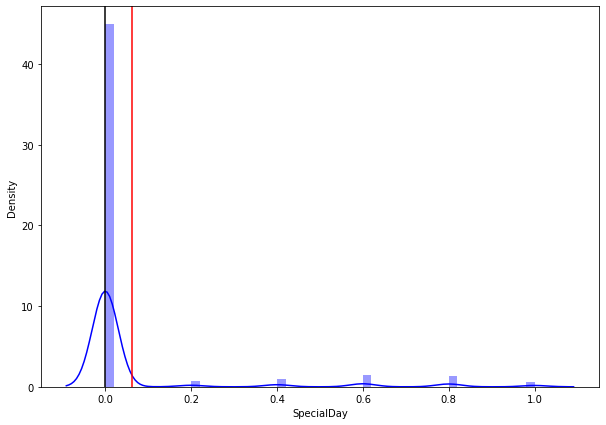

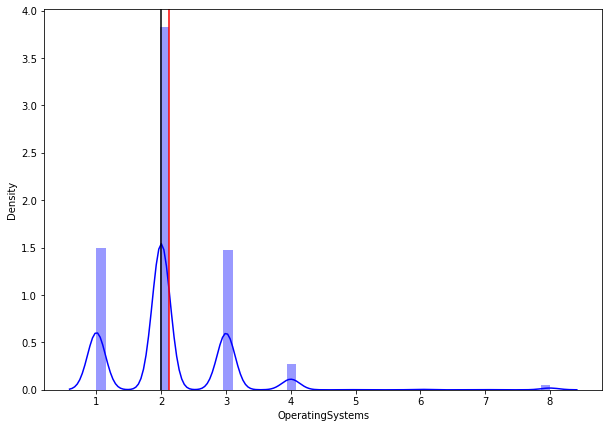

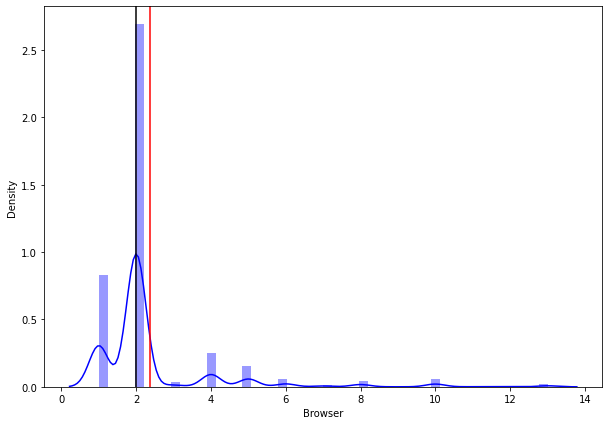

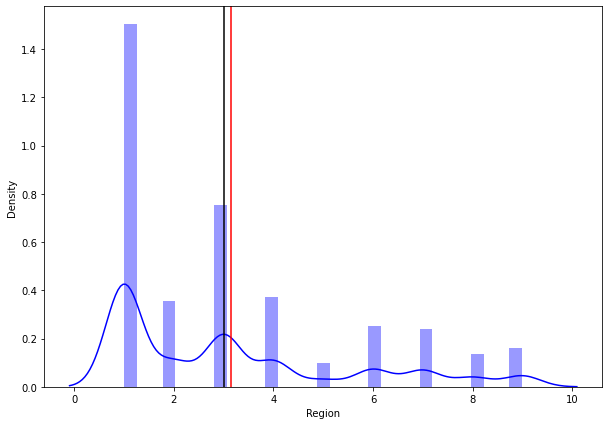

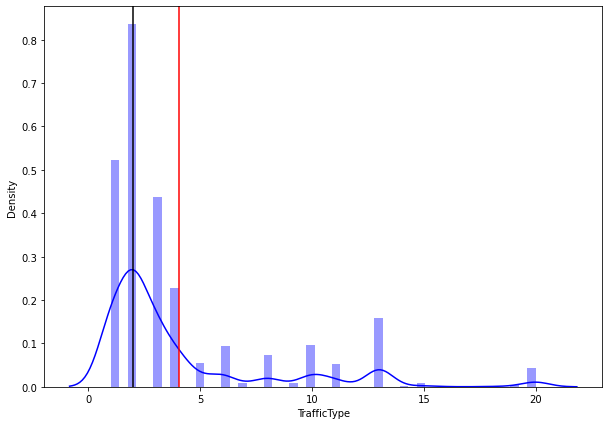

In [10]:
for i in df_num.columns:
    plt.figure(figsize =(10,7))
    sns.distplot(df_num[i], color = 'blue')
    plt.axvline(x = np.mean(df_num[i]), color = 'red')
    plt.axvline(x = np.median(df_num[i]), color = 'black')
    plt.show()

### Categorical Data

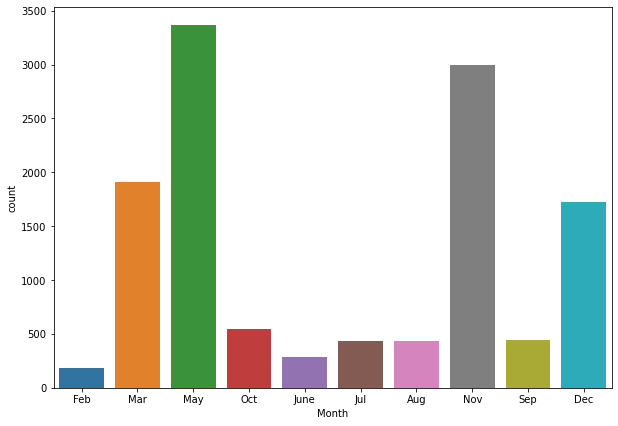

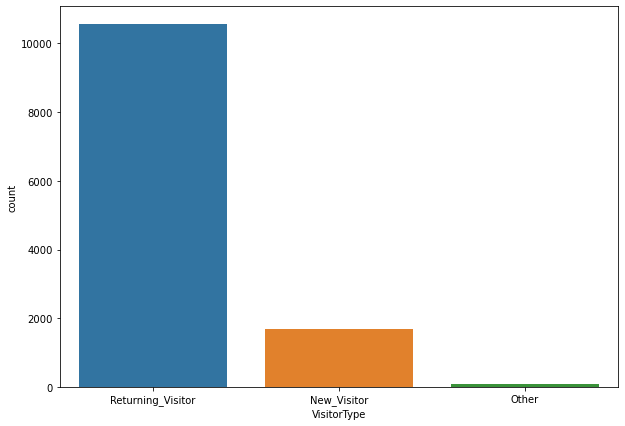

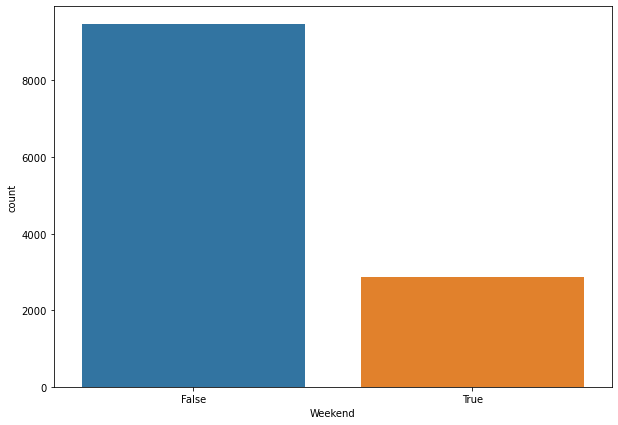

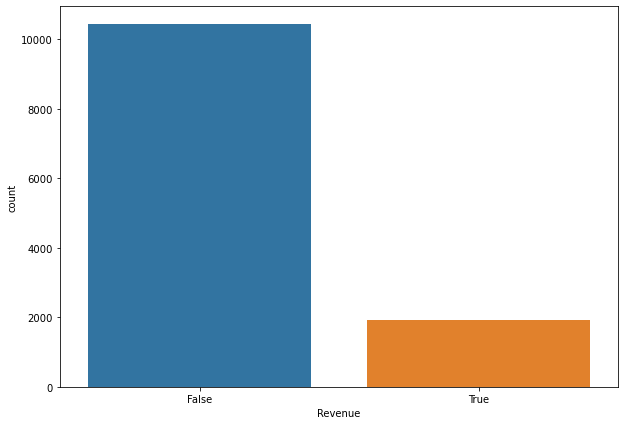

In [11]:
for i in df_category:
    plt.figure(figsize =(10,7))
    sns.countplot(df_category[i])
    plt.show()

### Target Variable Understanding

In [26]:
target1=df['Weekend']
target2=df['Revenue']

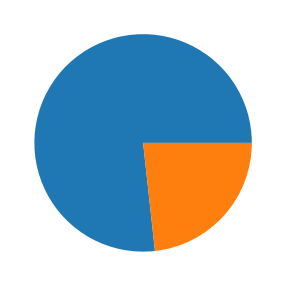

In [27]:
plt.figure(figsize=(10,5))
plt.pie(target1.value_counts())
plt.show()

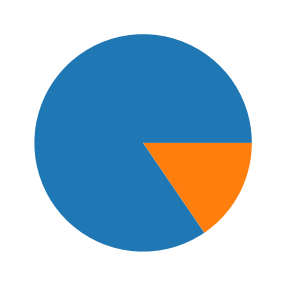

In [28]:
plt.figure(figsize=(10,5))
plt.pie(target2.value_counts())
plt.show()

In [30]:
print('WEEKEND')
print(target1.value_counts(normalize=True)*100)
print('REVENUE')
print(target2.value_counts(normalize=True)*100)

WEEKEND
False    76.739659
True     23.260341
Name: Weekend, dtype: float64
REVENUE
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


Looking at the correlation graph we drop all the colimns which show correlation greater than 0.6. The columns included in the drop are :

* Exit_Rates

In [63]:
drop_column=['ExitRates']
df.drop(drop_column,axis=1,inplace=True)


In [64]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Bivariate Analysis

## Numeric

### Wrt Weekend

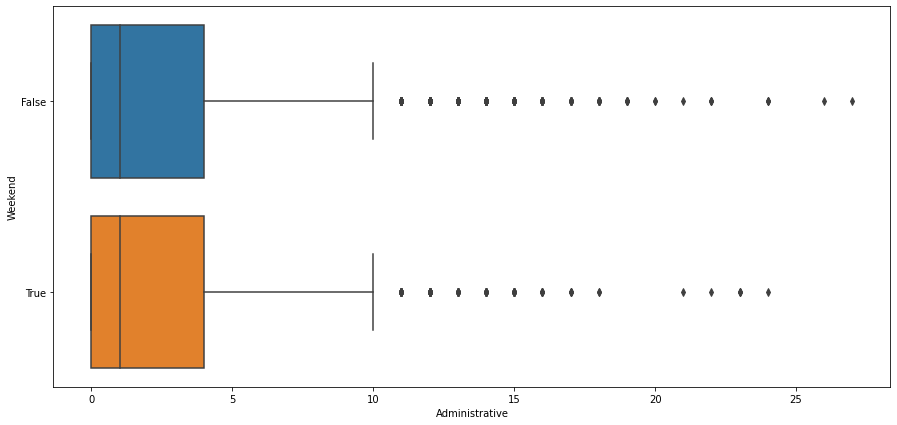

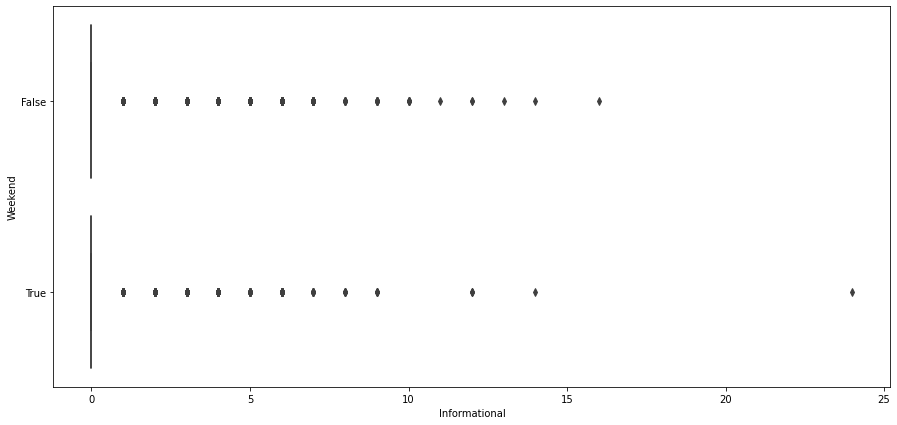

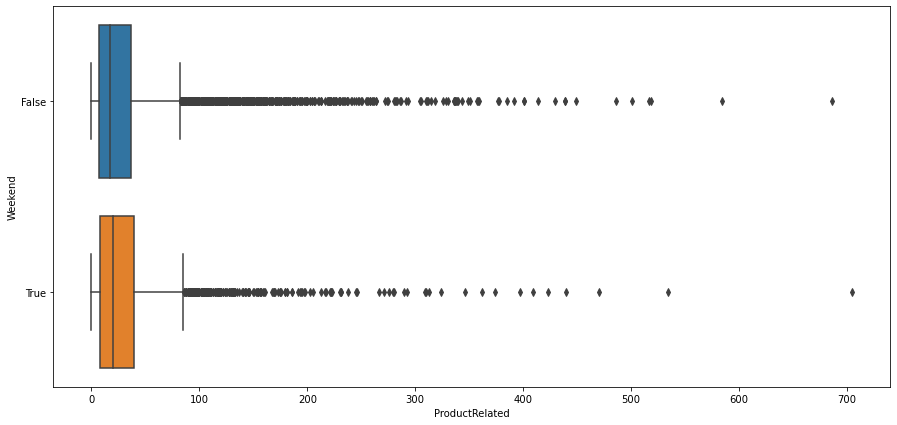

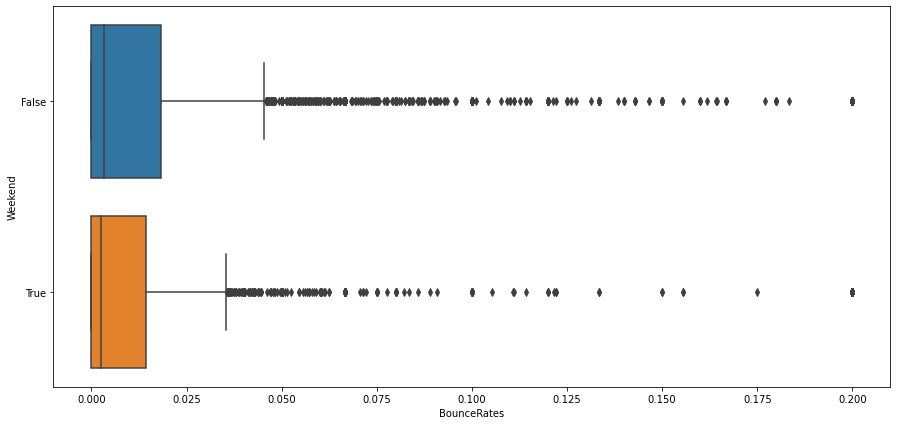

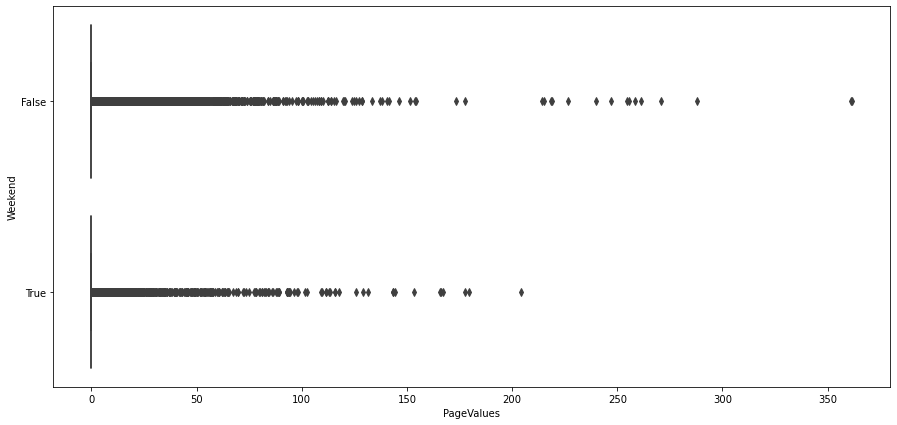

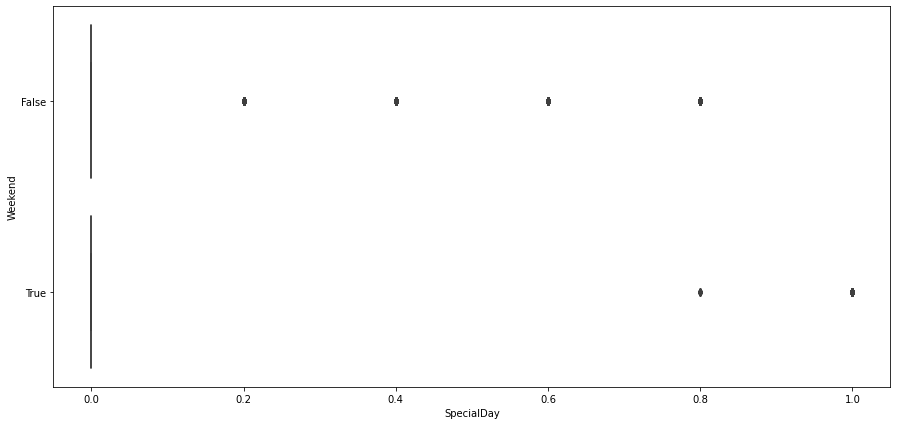

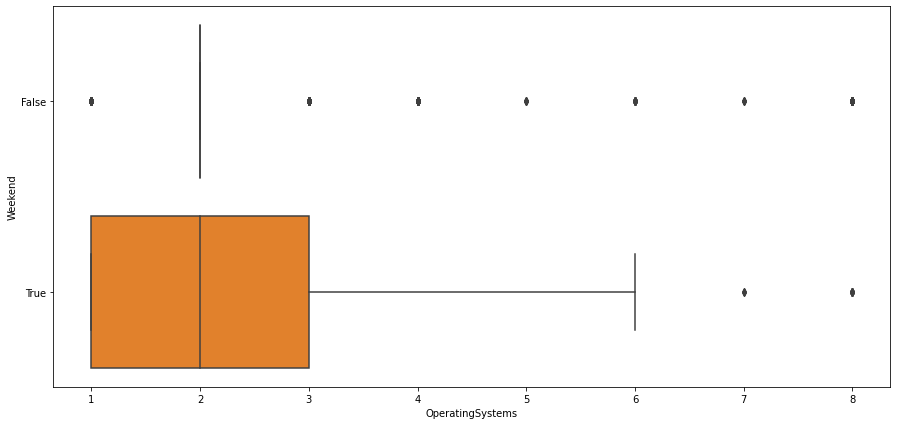

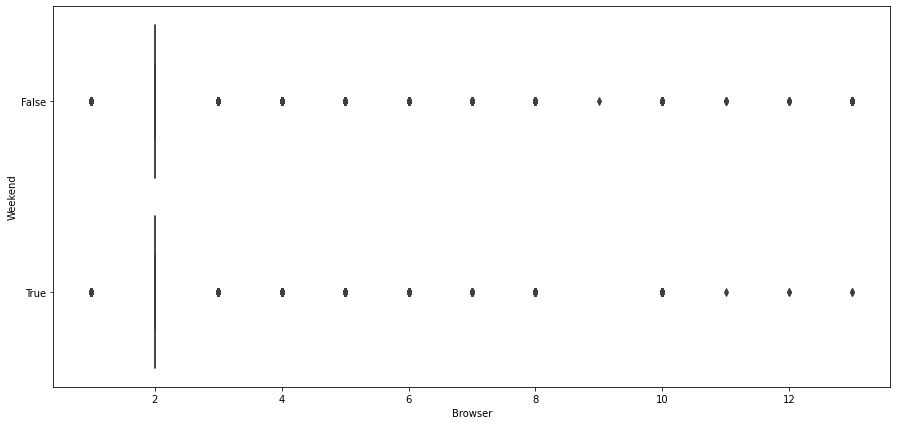

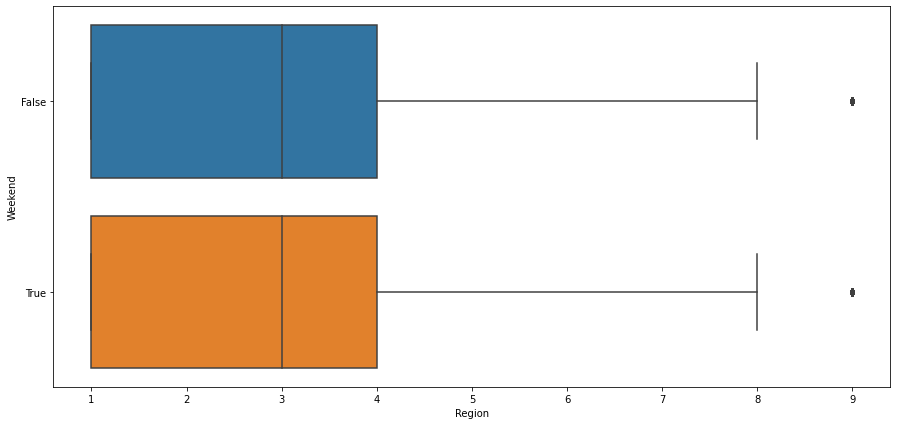

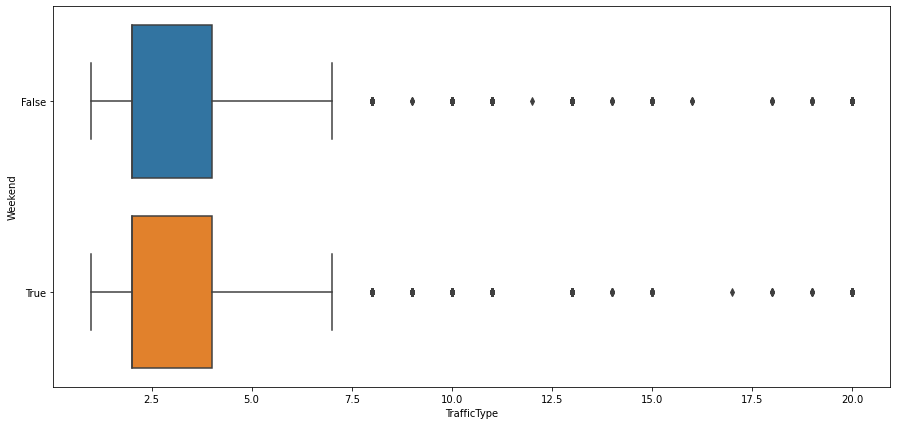

In [33]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize =(15,7))
    sns.boxplot(y='Weekend',x=i,data=df)
    plt.show()

### Wrt Revenue

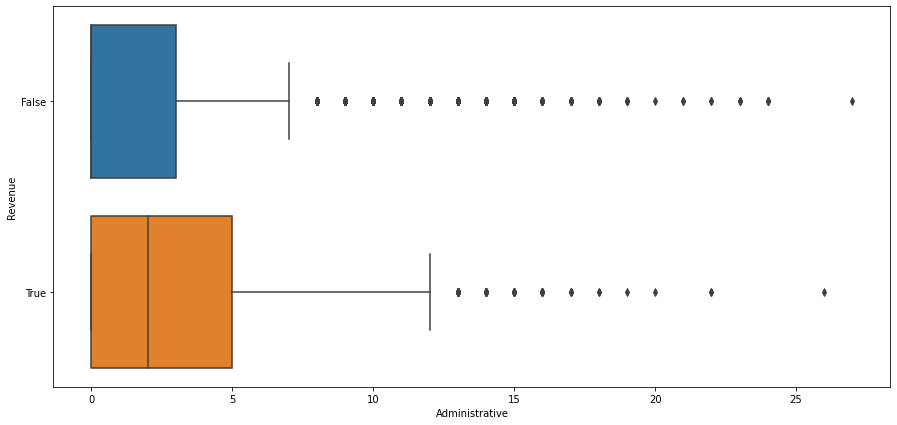

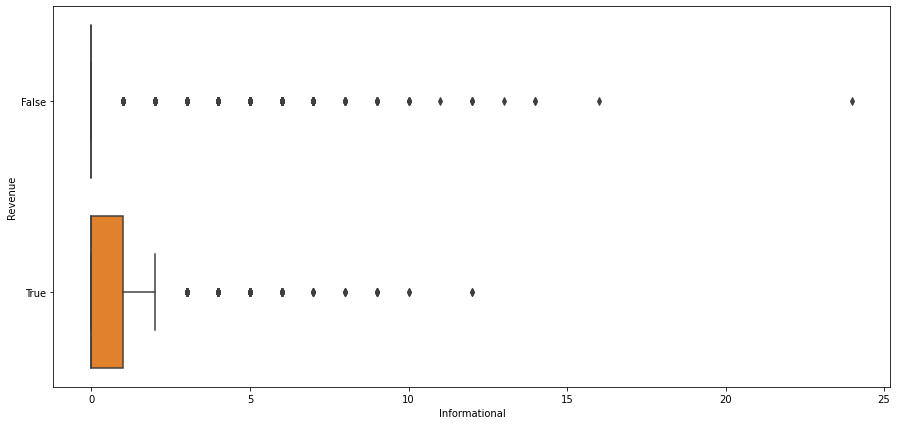

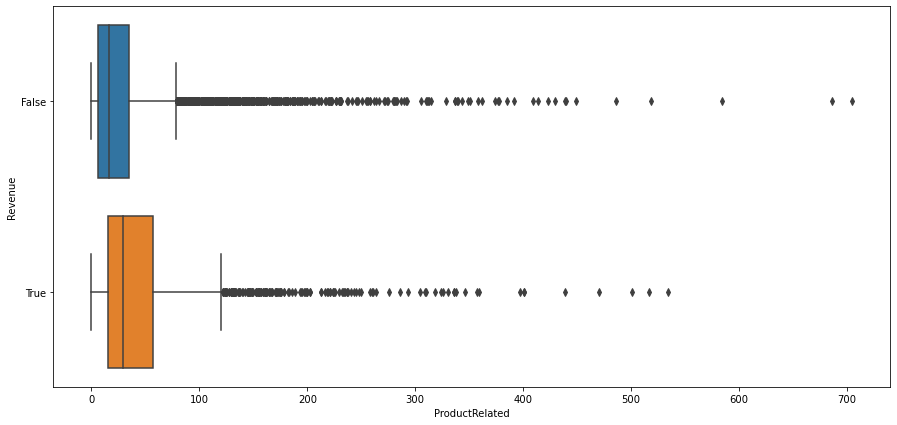

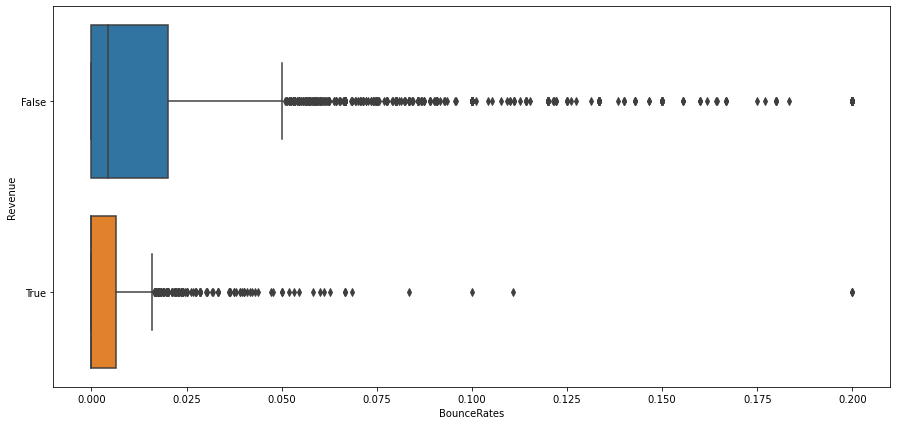

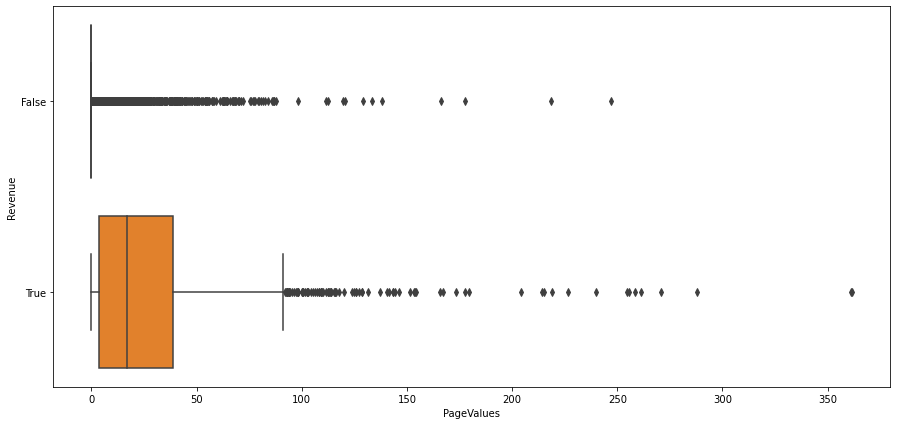

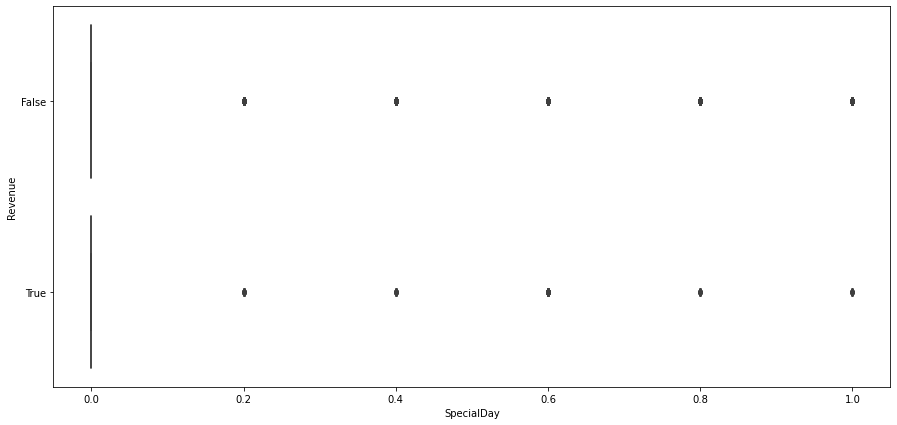

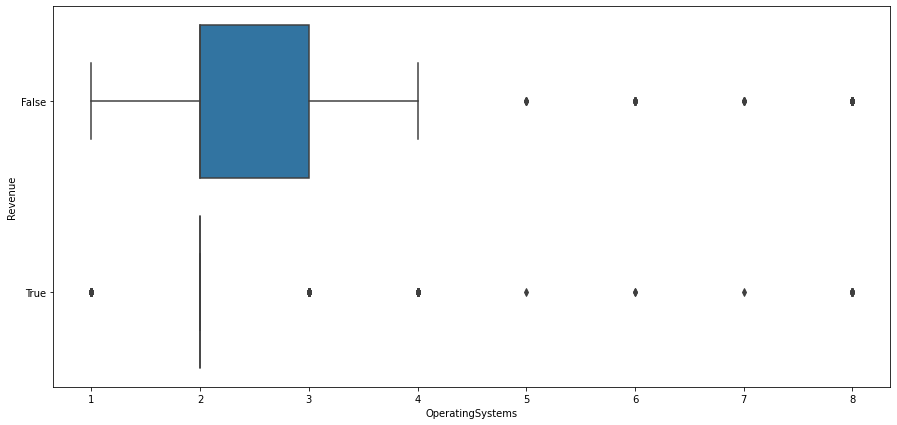

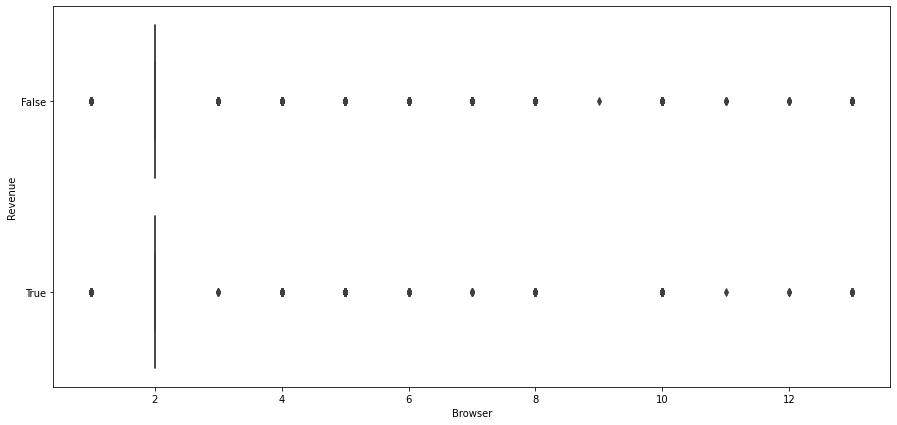

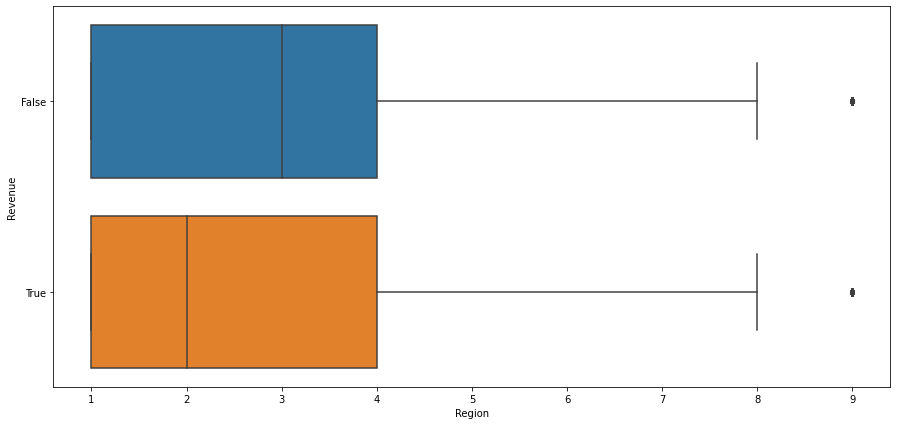

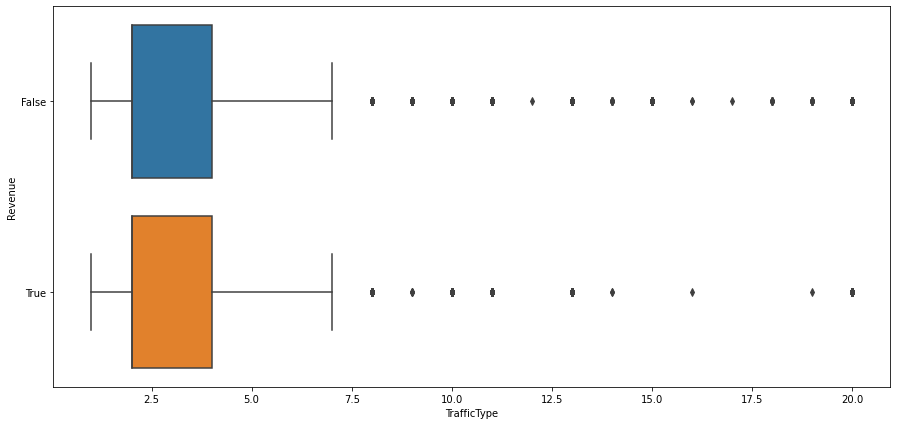

In [32]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize =(15,7))
    sns.boxplot(y='Revenue',x=i,data=df)
    plt.show()

## Categoric Analysis

### Wrt Weekend

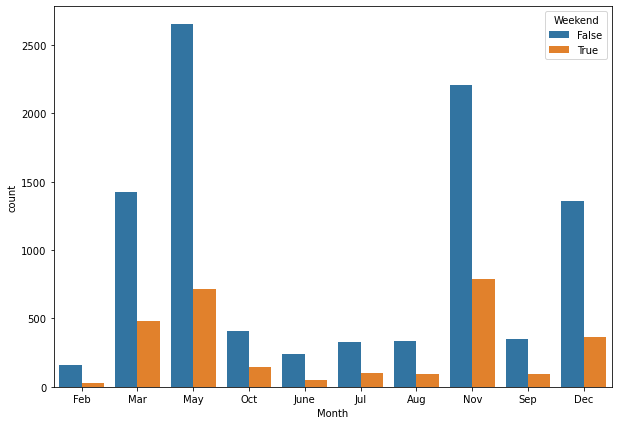

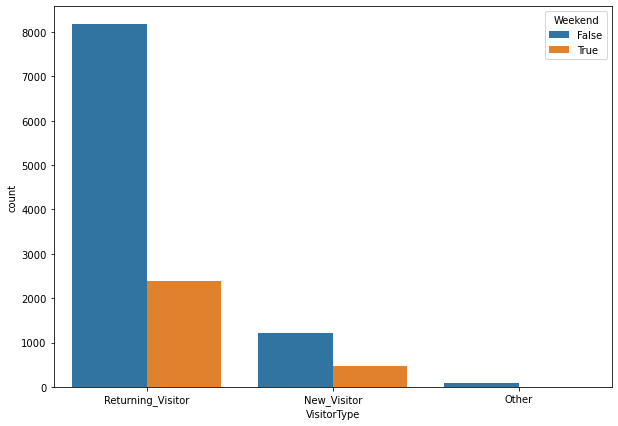

In [38]:
for i in df.select_dtypes(include=np.object).drop(['Weekend','Revenue'],axis=1).columns:
    plt.figure(figsize =(10,7))
    sns.countplot(df[i],hue=df['Weekend'])
    plt.show()

### Wrt Revenue

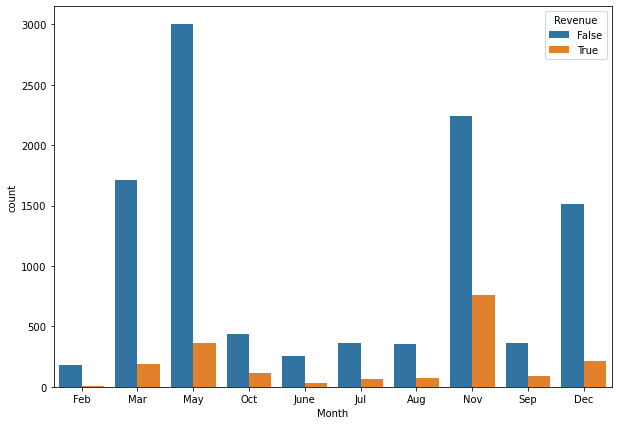

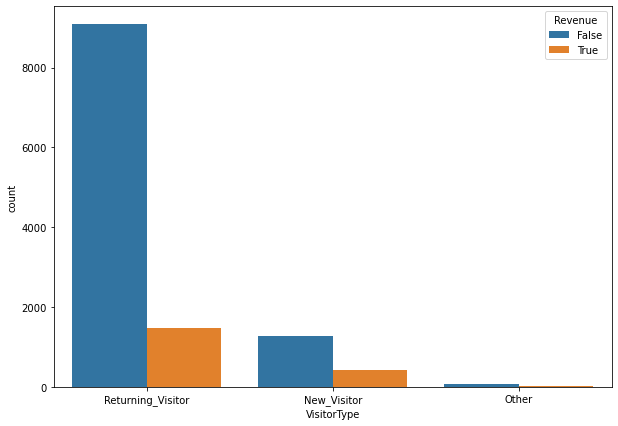

In [37]:
for i in df.select_dtypes(include=np.object).drop(['Weekend','Revenue'],axis=1).columns:
    plt.figure(figsize =(10,7))
    sns.countplot(df[i],hue=df['Revenue'])
    plt.show()

## Multi-Variate Analysis (Correlation)

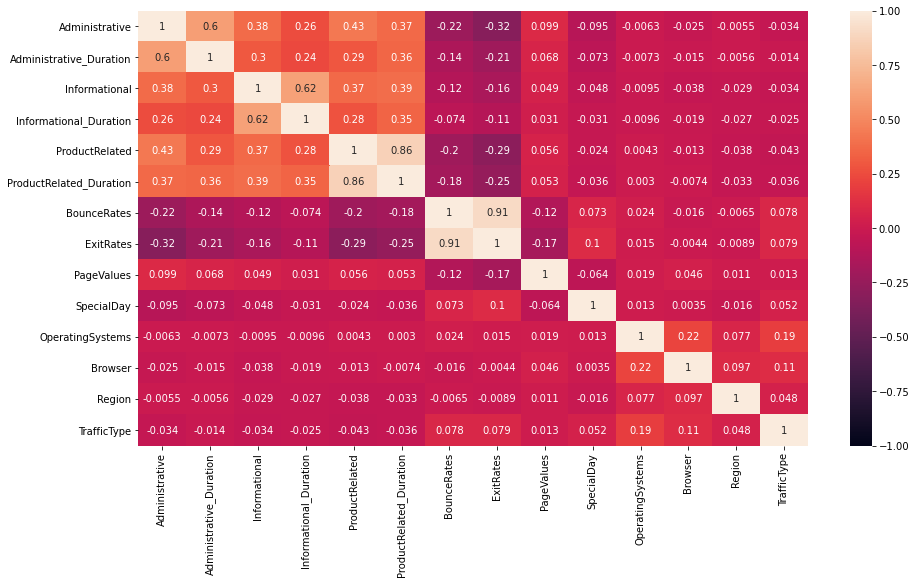

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, vmax=1, vmin=-1)
plt.show()

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train,test=train_test_split(df, train_size=0.7,random_state=5)
train.shape,test.shape

((8631, 14), (3699, 14))

## Data Preparation

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Encoding

Since no columns have an inherent hierarchy hence, we will nominally encode the categorical data using Label Encoder

In [39]:
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

In [40]:
train

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10350,5,0,470,0.000000,13.381494,0.0,7,4,2,9,2,2,1,1
11646,3,4,72,0.002747,0.000000,0.0,7,2,2,3,2,2,0,0
8865,0,0,3,0.066667,0.000000,0.0,7,2,2,1,3,2,0,0
2683,0,0,0,0.200000,0.000000,0.0,6,3,2,3,18,2,1,0
5634,5,0,25,0.007692,0.000000,0.0,8,4,1,9,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,44,0.060000,0.000000,0.6,6,3,2,1,13,2,0,0
9917,0,0,2,0.000000,0.000000,0.0,7,3,2,1,10,2,0,0
4079,0,0,3,0.066667,0.000000,0.0,6,2,2,2,3,2,1,0
2254,3,5,127,0.000256,0.000000,0.0,6,2,2,4,3,2,0,0


## X-Y Split

Since we have three types of predictions(Weekend, Revenue and Informational_Duration) to make hence we will split our operations into three branches from here. 

In [55]:
xtrain=train.iloc[:,:-2]
ytrain_weekend=train['Weekend']
ytrain_revenue=train['Revenue']

In [56]:
xtest=test.iloc[:,:-2]
ytest_weekend=test['Weekend']
ytest_revenue=test['Revenue']

## Scaling

We will apply Standard Scaling on all the variable to remove the effect  of units.

In [60]:
for i in xtrain.columns:
    xtrain_arr = xtrain[i].values.reshape(-1,1)
    xtest_arr = xtest[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain[i] = ss.transform(xtrain_arr)
    xtest[i] = ss.transform(xtest_arr)

# Model Training

Since it's a classification model we'll use 